### Part 1 - Import de todas as bibliotecas necessárias 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Part 2 - Leitura do local dataframe + infos básicas

In [18]:
df = pd.read_csv('RTA Dataset.csv')

In [ ]:
df.info()

In [21]:
df.isnull().sum()   #verificar quantas colunas têm valores nulos

Faixa Etária                    0
Género                          0
Nível de Educação             741
Relação com o Veículo         579
Experiência de Condução       829
Situação de Faixa             385
Tipo de Cruzamento            887
Tipo de Estrada               172
Condições do Piso               0
Condições de Visibilidade       0
Condiçoes Meteorológicas        0
Tipo de Colisão               155
N.º Veículos Envolvidos         0
Número de Vítimas               0
Movimento do Veículo          308
Género da Vítima                0
Faixa Etária da Vítima          0
Gravidade da Vítima             0
Ocupação da Vítima           3198
Causa do Acidente               0
Gravidade do Acidente           0
dtype: int64

In [ ]:
df.dtypes

### Part 3 - Analisar e eliminar colunas não importantes

Nesta parte, analisamos o que significam algumas colunas que não são importantes para a nossa análise

In [ ]:
#.unique() -> ver todos os valores de uma coluna

type_of_vehicle = df['Type_of_vehicle'].unique()    #ELIMINAR COM CERTEZA -> irrelevante
print(type_of_vehicle, "\n\n")

owner_of_vehicle = df['Owner_of_vehicle'].unique()  #ELIMINAR COM CERTEZA -> irrelevante
print(owner_of_vehicle, "\n\n")

service_year_of_vehicle = df['Service_year_of_vehicle'].unique()    #ELIMINAR COM CERTEZA -> muitos nans
print(service_year_of_vehicle, "\n\n")

defect_of_vehicle = df['Defect_of_vehicle'].value_counts()  #tem 7777 "no defect"
print(defect_of_vehicle, "\n\n")    #ELIMINAR -> DADOS CONFUSOS

area_accident_occured = df['Area_accident_occured'].value_counts() #ELIMINAR -> IRRELEVANTE
print(area_accident_occured, "\n\n")

road_allignment = df['Road_allignment'].value_counts()  #ELIMINAR -> muitos dados iguais -> +80%  
print(road_allignment, "\n\n")

pedestrian_movement = df['Pedestrian_movement'].value_counts()  #ELIMINAR -> dados sem sentido
print(pedestrian_movement, "\n\n")

fitness_of_casuality = df['Fitness_of_casuality'].value_counts()  #ELIMINAR -> faltam dados e muitos iguais
print(fitness_of_casuality, "\n\n")

casualty_class = df['Casualty_class'].value_counts()  #ELIMINAR -> ver matriz de correlação
print(casualty_class, "\n\n")

Após a análise, eliminamos as colunas que afetam pouco a nossa saída, que, como sabemos, é a última coluna, "Gravidade do Acidente"

In [19]:
colunas_a_eliminar = ['Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured',
                      'Road_allignment', 'Pedestrian_movement', 'Fitness_of_casuality', 'Casualty_class', 'Time', 'Day_of_week']

df.drop(colunas_a_eliminar, axis = 1, inplace = True)

In [6]:
df

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,NaN,No junction,Asphalt roads,Dry,Daylight,...,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,NaN,Moving Backward,Slight Injury
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,NaN,Overtaking,Slight Injury
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Dry,Daylight,...,Collision with roadside objects,2,2,Going straight,Male,31-50,3,Driver,Changing lane to the left,Serious Injury
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,2,Going straight,Female,18-30,3,Driver,Changing lane to the right,Slight Injury
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,NaN,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,NaN,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,1,Going straight,na,na,na,Driver,No distancing,Slight Injury
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,1,Other,na,na,na,Driver,No distancing,Slight Injury
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,1,1,Other,Male,31-50,3,Driver,Changing lane to the right,Serious Injury
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,1,Other,na,na,na,Driver,Driving under the influence of drugs,Slight Injury


Agora, para uma melhor compreensão da tabela, vamos renomear as colunas

In [20]:
#time, day_of_week, age_band_of_driver, sex_of_driver, educational_level, vehicle_driver_relation, driving_experience
#type_of_vehicle, owner_of_vehicle, service_year_of_vehicle, defect_of_vehicle, area_accident_occured
#lanes_or_medians, road_allignment, types_of_junction, road_surface_type, road_surface_conditions, ligh_conditions
#weather_conditions, type_of_collision, number_of_vehicles_involved, number_of_casualties, vehicle_movement
#casualty_class, sex_of_casualty, age_band_of_casualty, casualty_severity, work_of_casualty, fitness_of_casualty
#pedestrian_movement, cause_of_accident, accident_severity, 
colunas_renomeadas = ['Faixa Etária', 'Género', 'Nível de Educação', 'Relação com o Veículo', 
                      'Experiência de Condução', 'Situação de Faixa', 'Tipo de Cruzamento',
                      'Tipo de Estrada', 'Condições do Piso', 'Condições de Visibilidade',
                      'Condiçoes Meteorológicas', 'Tipo de Colisão', 'N.º Veículos Envolvidos',
                      'Número de Vítimas', 'Movimento do Veículo', 'Género da Vítima',
                      'Faixa Etária da Vítima', 'Gravidade da Vítima', 'Ocupação da Vítima',
                      'Causa do Acidente', 'Gravidade do Acidente']

df.columns = colunas_renomeadas
df

,Faixa Etária,Género,Nível de Educação,Relação com o Veículo,Experiência de Condução,Situação de Faixa,Tipo de Cruzamento,Tipo de Estrada,Condições do Piso,Condições de Visibilidade,...,Tipo de Colisão,N.º Veículos Envolvidos,Número de Vítimas,Movimento do Veículo,Género da Vítima,Faixa Etária da Vítima,Gravidade da Vítima,Ocupação da Vítima,Causa do Acidente,Gravidade do Acidente
0,18-30,Male,Above high school,Employee,1-2yr,NaN,No junction,Asphalt roads,Dry,Daylight,...,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,NaN,Moving Backward,Slight Injury
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,NaN,Overtaking,Slight Injury
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Dry,Daylight,...,Collision with roadside objects,2,2,Going straight,Male,31-50,3,Driver,Changing lane to the left,Serious Injury
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,2,Going straight,Female,18-30,3,Driver,Changing lane to the right,Slight Injury
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,NaN,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,NaN,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,1,Going straight,na,na,na,Driver,No distancing,Slight Injury
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,1,Other,na,na,na,Driver,No distancing,Slight Injury
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,1,1,Other,Male,31-50,3,Driver,Changing lane to the right,Serious Injury
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,1,Other,na,na,na,Driver,Driving under the influence of drugs,Slight Injury


### Part 4 - Análise e substituição de valores nulos

Nesta parte, substituímos os valores "na" por um valor verdadeirmente nulo, "NaN"

In [22]:
df.replace('na', pd.NA, inplace=True)
df.isnull().sum()

Faixa Etária                    0
Género                          0
Nível de Educação             741
Relação com o Veículo         579
Experiência de Condução       829
Situação de Faixa             385
Tipo de Cruzamento            887
Tipo de Estrada               172
Condições do Piso               0
Condições de Visibilidade       0
Condiçoes Meteorológicas        0
Tipo de Colisão               155
N.º Veículos Envolvidos         0
Número de Vítimas               0
Movimento do Veículo          308
Género da Vítima             4443
Faixa Etária da Vítima       4443
Gravidade da Vítima          4443
Ocupação da Vítima           3198
Causa do Acidente               0
Gravidade do Acidente           0
dtype: int64

Vamos também realizar, através do método One-Hot-Encoding, a substituição de valores categóricos por valores numéricos

In [28]:
#genero_no = pd.get_dummies(df['Género'], drop_first = True, ) * 1
#genero_no
#df = pd.concat([df, workex_no], axis = 1)

#df = df.drop('sl_no', axis=1)
#df = df.rename(columns={'Yes': 'workex_no'})

#df


# Extract the 'Género' column
PA = df['Género']

# Filter out rows where 'Género' is equal to -1
valid_values = df.loc[df['Género'] != -1]

# Calculate the mean of valid values in the 'Género' column
mean_value = valid_values['Género'].mean()

# Replace the value -1 in the 'Género' column with the mean value
df.loc[df['Género'] == -1, 'Género'] = mean_value

# Now 'df' contains the updated values



TypeError: Could not convert string 'MaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleUnknownMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleUnknownMaleMaleMaleMaleMaleFemaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleUnknownMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleUnknownMaleMaleMaleUnknownMaleFemaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleUnknownMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleUnknownMaleMaleMaleMaleUnknownMaleMaleMaleMaleFemaleMaleFemaleUnknownMaleMaleMaleUnknownMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleUnknownMaleMaleUnknownMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleUnknownMaleMaleMaleFemaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownFemaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleFemaleFemaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleUnknownMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleUnknownMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleUnknownMaleMaleMaleUnknownMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleFemaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleFemaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleUnknownMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleUnknownUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleUnknownUnknownMaleMaleMaleUnknownUnknownUnknownMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleUnknownMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleUnknownMaleMaleMaleUnknownMaleMaleMaleMaleMaleUnknownMaleMaleFemaleUnknownMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleUnknownMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleFemaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleUnknownMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleUnknownMaleFemaleMaleUnknownMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleFemaleMaleMaleUnknownFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleFemaleMaleFemaleUnknownUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleUnknownMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleUnknownMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleUnknownMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleUnknownFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleUnknownMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleUnknownMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMale' to numeric

In [23]:
#substituir valores em falta
PA = df['Ocupação da Vítima']

valid_values = df.loc[df['Ocupação da Vítima'] != -1]
valid_values
#mean_value = valid_values.mean()['Ocupação da Vítima'] 
#df.loc[df['Ocupação da Vítima'] == -1, 'Ocupação da Vítima'] = mean_value

,Faixa Etária,Género,Nível de Educação,Relação com o Veículo,Experiência de Condução,Situação de Faixa,Tipo de Cruzamento,Tipo de Estrada,Condições do Piso,Condições de Visibilidade,...,Tipo de Colisão,N.º Veículos Envolvidos,Número de Vítimas,Movimento do Veículo,Género da Vítima,Faixa Etária da Vítima,Gravidade da Vítima,Ocupação da Vítima,Causa do Acidente,Gravidade do Acidente
0,18-30,Male,Above high school,Employee,1-2yr,NaN,No junction,Asphalt roads,Dry,Daylight,...,Collision with roadside-parked vehicles,2,2,Going straight,<NA>,<NA>,<NA>,NaN,Moving Backward,Slight Injury
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,2,Going straight,<NA>,<NA>,<NA>,NaN,Overtaking,Slight Injury
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Dry,Daylight,...,Collision with roadside objects,2,2,Going straight,Male,31-50,3,Driver,Changing lane to the left,Serious Injury
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,2,Going straight,Female,18-30,3,Driver,Changing lane to the right,Slight Injury
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,2,Going straight,<NA>,<NA>,<NA>,NaN,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,NaN,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,1,Going straight,<NA>,<NA>,<NA>,Driver,No distancing,Slight Injury
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,1,Other,<NA>,<NA>,<NA>,Driver,No distancing,Slight Injury
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,1,1,Other,Male,31-50,3,Driver,Changing lane to the right,Serious Injury
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,1,Other,<NA>,<NA>,<NA>,Driver,Driving under the influence of drugs,Slight Injury


In [ ]:
df

Fazer matriz de correlação \n
Ver matriz de correlação da google
Perceber quantos NA existem para o target (Accident_severity)
Perceber se o número de Na que afeta é importante ou não

In [8]:
matrix = np.corrcoef(df['Number_of_vehicles_involved'], df['Number_of_casualties'])
matrix

array([[1.        , 0.21342682],
       [0.21342682, 1.        ]])

Número de exemplos nos nossos dados:  12316


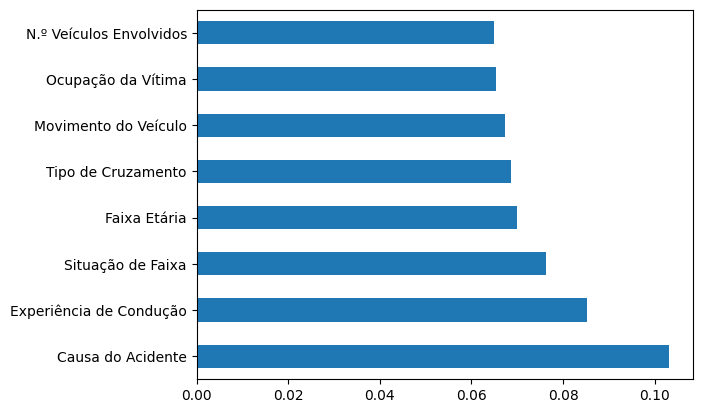

In [52]:
#X
X = df.iloc[:, :-1].values # todas as colunas menos a target
#Y
Y =  df.iloc[:, -1].values # coluna target

print("Número de exemplos nos nossos dados: ", X.shape[0])

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,Y)

feat_importances = pd.Series(model.feature_importances_, index=df.columns[:-1])
feat_importances.nlargest(8).plot(kind='barh')

plt.show()


Part 5 - Fazer matriz de correlação

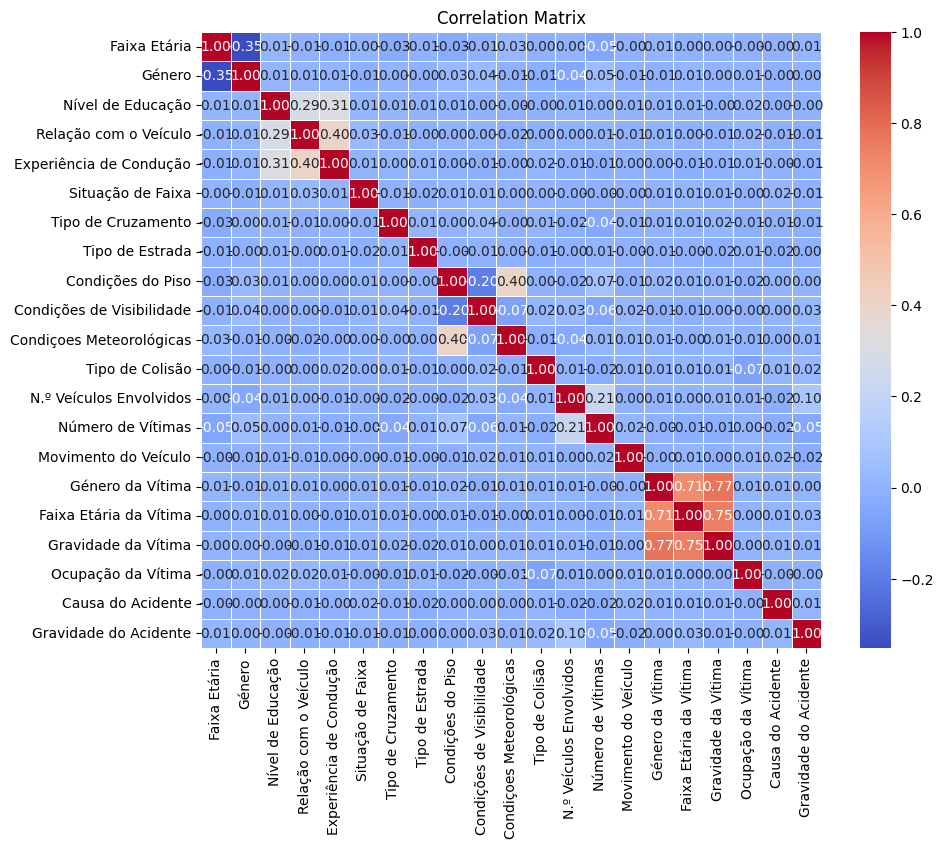

In [53]:
#sns.set(style="white")
from sklearn.preprocessing import LabelEncoder
# Create a heatmap using seaborn
# Convert object-type columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column])
    
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()